# EDA on Layoffs 2022

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [470]:
df = pd.read_csv("layoffs.csv")

In [471]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


In [472]:
df.shape

(1659, 9)

In [473]:
df.columns

Index(['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 'stage', 'country', 'funds_raised'],
      dtype='object')

In [474]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [475]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         480
percentage_laid_off    549
date                     0
stage                    4
country                  0
funds_raised           115
dtype: int64

In this data many of the company has null value in the "total_laid_off" and we not replace the null value with any assumption so we can easily replace the null value with "0"

In [476]:
df["total_laid_off"] = df["total_laid_off"].fillna(0)
df["percentage_laid_off"] = df["percentage_laid_off"].fillna(0)
df["stage"] = df["stage"].fillna(0)
df["industry"] =df["industry"].fillna(0)
df["funds_raised"] = df["funds_raised"].fillna(0)

In [477]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

### Top Layoffs :

In [478]:
top_layoff = df.nlargest(10,["total_laid_off"])
top_layoff

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
81,Meta,SF Bay Area,Consumer,11000.0,0.13,2022-11-09,IPO,United States,26000.0
21,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0
1083,Booking.com,Amsterdam,Travel,4375.0,0.25,2020-07-30,Acquired,Netherlands,0.0
22,Cisco,SF Bay Area,Infrastructure,4100.0,0.05,2022-11-16,IPO,United States,2.0
110,Twitter,SF Bay Area,Consumer,3700.0,0.50,2022-11-04,IPO,United States,12900.0
1232,Uber,SF Bay Area,Transportation,3700.0,0.14,2020-05-06,IPO,United States,24700.0
963,Better.com,New York City,Real Estate,3000.0,0.33,2022-03-08,Unknown,United States,905.0
1187,Uber,SF Bay Area,Transportation,3000.0,0.13,2020-05-18,IPO,United States,24700.0
976,Peloton,New York City,Fitness,2800.0,0.20,2022-02-08,IPO,United States,1900.0
1387,Groupon,Chicago,Retail,2800.0,0.44,2020-04-13,IPO,United States,1400.0


<AxesSubplot:xlabel='company', ylabel='total_laid_off'>

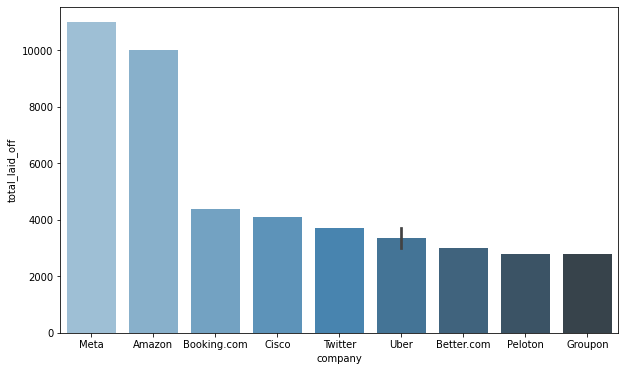

In [479]:
plt.figure(figsize=(10,6))
sns.barplot(x = top_layoff.company, y = top_layoff.total_laid_off, palette="Blues_d")

###### Conclusion:-
* Meta, Amazon has highest layoff 
* Meta topping the chart with over 11000 layoffs
* Booking.com , cisco, Twitter, Uber etc also follow the same pattern in the company 

### Layoffs by the companies across  10 Sectors:

In [480]:
# In this case we want to find out the "sector" with layoff so we use "GroupBy" Functionality
a = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending = False)
a = a.head(10)
b = np.array(a)
b

array([28575., 28194., 27237., 19463., 17718., 16022., 14876., 11295.,
       10135.,  8538.])

In [481]:
a.index

Index(['Transportation', 'Consumer', 'Retail', 'Finance', 'Food',
       'Real Estate', 'Travel', 'Healthcare', 'Education', 'Fitness'],
      dtype='object', name='industry')

In [482]:
a

industry
Transportation    28575.0
Consumer          28194.0
Retail            27237.0
Finance           19463.0
Food              17718.0
Real Estate       16022.0
Travel            14876.0
Healthcare        11295.0
Education         10135.0
Fitness            8538.0
Name: total_laid_off, dtype: float64

In [483]:
a.keys

<bound method Series.keys of industry
Transportation    28575.0
Consumer          28194.0
Retail            27237.0
Finance           19463.0
Food              17718.0
Real Estate       16022.0
Travel            14876.0
Healthcare        11295.0
Education         10135.0
Fitness            8538.0
Name: total_laid_off, dtype: float64>

Text(0, 0.5, 'Counts')

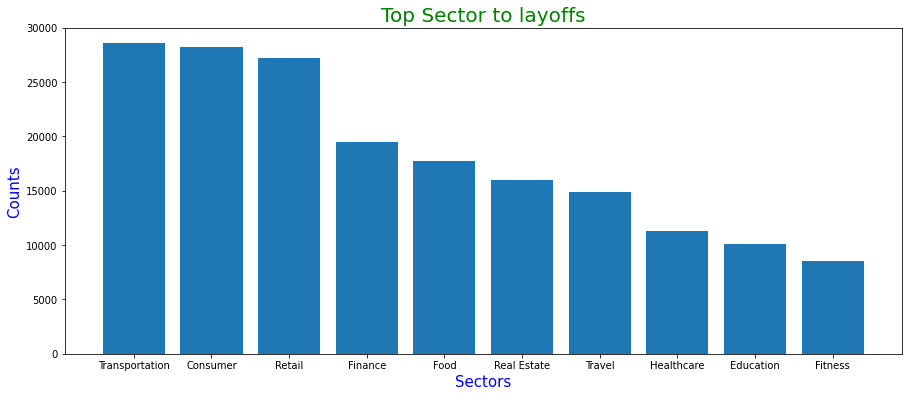

In [484]:
plt.figure(figsize=(15,6))
plt.bar(a.index,b)
plt.title("Top Sector to layoffs",fontdict = {'size':20, 'color':'Green'})
plt.xlabel("Sectors", fontdict={'size':15, 'color':'Blue'})
plt.ylabel("Counts",fontdict={'size':15, 'color': 'Blue'})


###### Conclusion:-
* Transportation, Consumer, Retail sector are higly affected by the this Layoff's 
* Same Condition occurs in the Finance, Food, Real-Estate, Travel .. etc as shown in graph 

### Countries that are Mostly affected by Layoffs:

In [485]:
countries = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)
countries

country
United States     154764.0
India              29331.0
Brazil              7225.0
Singapore           5493.0
Canada              5109.0
Netherlands         5070.0
United Kingdom      4619.0
China               4430.0
Germany             3588.0
Indonesia           2690.0
Name: total_laid_off, dtype: float64

In [486]:
countries_keys = np.array(countries)

Text(0, 0.5, 'Counts')

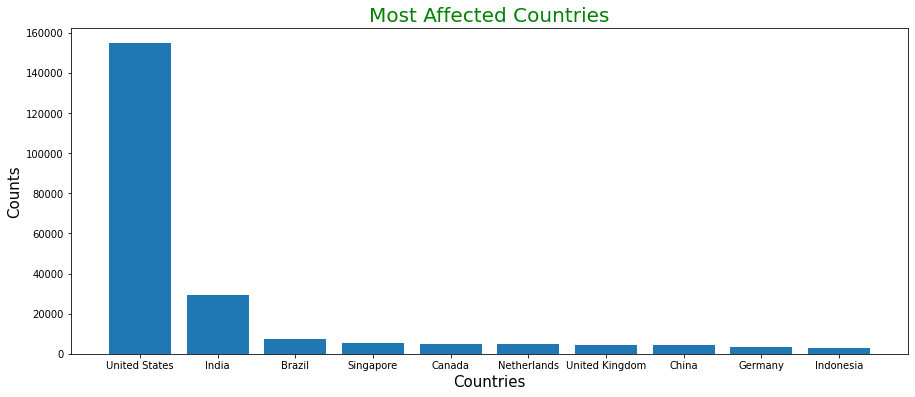

In [487]:
plt.figure(figsize=(15,6))
plt.bar(countries.index,countries_keys)
plt.title("Most Affected Countries", fontdict={'size':20,'color':'Green'})
plt.xlabel("Countries",fontdict={'size':15})
plt.ylabel("Counts",fontdict={'size':15})

###### Conclusion:-
* United State has seen the most layoffs :-154764
* In list india also got positon at 2nd highest layoffs :-29331
* followed by brazil

### India City with Most no. of Layoffs:

In [488]:
lct = df[df.country =='India']
lct

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
88,Plum,Bengaluru,Healthcare,36.0,0.10,2022-11-09,Series A,India,20.0
102,Unacademy,Bengaluru,Education,350.0,0.10,2022-11-07,Series H,India,838.0
109,Practically,Hyderabad,Education,0.0,0.00,2022-11-06,Unknown,India,14.0
111,Udaan,Bengaluru,Retail,350.0,0.00,2022-11-04,Unknown,India,1500.0
...,...,...,...,...,...,...,...,...,...
1524,Acko,Mumbai,Finance,45.0,0.09,2020-04-01,Unknown,India,143.0
1556,FabHotels,New Delhi,Travel,80.0,0.20,2020-03-30,Series B,India,48.0
1570,TravelTriangle,Gurugram,Travel,250.0,0.50,2020-03-28,Series D,India,47.0
1597,Fareportal,Gurugram,Travel,200.0,0.00,2020-03-26,Unknown,India,0.0


In [489]:
city_layoff = pd.DataFrame(lct['location'].value_counts())
city_layoff

,location
Bengaluru,52
Mumbai,18
Gurugram,14
New Delhi,12
Noida,2
Chennai,2
Hyderabad,1
Ahmedabad,1


In [490]:
city_layoff.keys

<bound method NDFrame.keys of            location
Bengaluru        52
Mumbai           18
Gurugram         14
New Delhi        12
Noida             2
Chennai           2
Hyderabad         1
Ahmedabad         1>

In [491]:
city_layoff.columns

Index(['location'], dtype='object')

<AxesSubplot:>

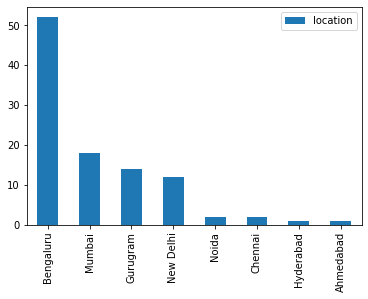

In [492]:
city_layoff.plot(kind = 'bar')

In [493]:
city_layoff = city_layoff.reset_index()

In [494]:
city_layoff = city_layoff.rename(columns = {'index':'Citys','location':'Location'})

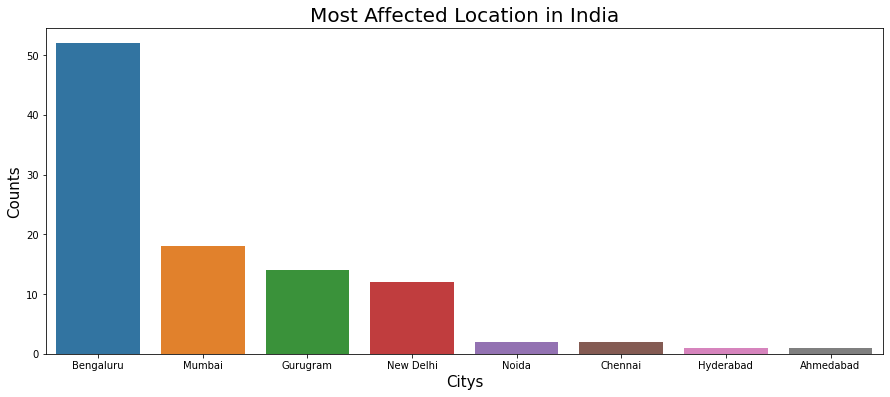

In [495]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x = city_layoff.Citys,y = city_layoff.Location)
plt.title("Most Affected Location in India",fontdict={'size':20})
plt.xlabel("Citys", fontdict={'size':15})
plt.ylabel("Counts",fontdict={'size':15})
plt.show()

In [496]:
lct.groupby('company')['total_laid_off'].value_counts().sort_values(ascending = False)

company     total_laid_off
MakeMyTrip  350.0             2
Zomato      520.0             1
Instamojo   6.0               1
Eruditus    40.0              1
FabHotels   80.0              1
                             ..
Rupeek      50.0              1
            180.0             1
Sea         350.0             1
ShareChat   101.0             1
Acko        45.0              1
Name: total_laid_off, Length: 101, dtype: int64

In [497]:
d=lct['company'].value_counts().sort_values(ascending = False)
d = pd.DataFrame(d)

In [498]:
d[d.company>=2]

,company
Ola,3
Unacademy,3
Vedantu,3
Meesho,3
Swiggy,3
Bounce,3
Zomato,2
FrontRow,2
CarDekho,2
Rupeek,2


In [499]:
lct[lct["company"]=="Paytm"]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1322,Paytm,New Delhi,Finance,500.0,0.0,2020-04-21,Unknown,India,2200.0


In [500]:
lct[lct['company']=="MakeMyTrip"]


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
1064,MakeMyTrip,New Delhi,Travel,350.0,0.1,2020-08-31,IPO,India,548.0
1157,MakeMyTrip,Gurugram,Travel,350.0,0.1,2020-06-01,IPO,India,548.0


In [501]:
lct[lct["company"]=="Ola"]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
274,Ola,Bengaluru,Transportation,200.0,0.00,2022-09-19,Series J,India,5000.0
497,Ola,Bengaluru,Transportation,1000.0,0.00,2022-07-29,Series J,India,5000.0
1177,Ola,Bengaluru,Transportation,1400.0,0.35,2020-05-20,Series J,India,3800.0


###### No. of time Total_laid_off occurs
* As show in the above chart and detail we see that this company has total no. of Entery enter in the total no.of laid off process

In [502]:
India_lay = lct.groupby("company")["total_laid_off"].value_counts().sort_values(ascending = False)

In [503]:
l = pd.DataFrame(India_lay)
l

total_laid_off
company    total_laid_off                
MakeMyTrip 350.0                        2
Zomato     520.0                        1
Instamojo  6.0                          1
Eruditus   40.0                         1
FabHotels  80.0                         1
...                                   ...
Rupeek     50.0                         1
           180.0                        1
Sea        350.0                        1
ShareChat  101.0                        1
Acko       45.0                         1

[101 rows x 1 columns]

In [504]:
l = l.rename(columns={"total_laid_off":"counts"})
l

counts
company    total_laid_off        
MakeMyTrip 350.0                2
Zomato     520.0                1
Instamojo  6.0                  1
Eruditus   40.0                 1
FabHotels  80.0                 1
...                           ...
Rupeek     50.0                 1
           180.0                1
Sea        350.0                1
ShareChat  101.0                1
Acko       45.0                 1

[101 rows x 1 columns]

In [505]:
l = l.reset_index()
l

,company,total_laid_off,counts
0,MakeMyTrip,350.0,2
1,Zomato,520.0,1
2,Instamojo,6.0,1
3,Eruditus,40.0,1
4,FabHotels,80.0,1
...,...,...,...
96,Rupeek,50.0,1
97,Rupeek,180.0,1
98,Sea,350.0,1
99,ShareChat,101.0,1


In [506]:
l.columns

Index(['company', 'total_laid_off', 'counts'], dtype='object')

In [507]:
l[l.company == "MakeMyTrip"]

,company,total_laid_off,counts
0,MakeMyTrip,350.0,2


In [508]:
l[l.company == "Zomato"]

,company,total_laid_off,counts
1,Zomato,520.0,1
51,Zomato,100.0,1


In [509]:
l["total_counts"] = l["total_laid_off"] * l["counts"]
l.columns

Index(['company', 'total_laid_off', 'counts', 'total_counts'], dtype='object')

In [510]:
l['total_counts'].sum()

29331.0

In [511]:
l

,company,total_laid_off,counts,total_counts
0,MakeMyTrip,350.0,2,700.0
1,Zomato,520.0,1,520.0
2,Instamojo,6.0,1,6.0
3,Eruditus,40.0,1,40.0
4,FabHotels,80.0,1,80.0
...,...,...,...,...
96,Rupeek,50.0,1,50.0
97,Rupeek,180.0,1,180.0
98,Sea,350.0,1,350.0
99,ShareChat,101.0,1,101.0


In [512]:
l1 = l.groupby('company')['total_counts'].sum().sort_values(ascending = False)
l1

company
Ola            2600.0
Byju's         2500.0
Swiggy         2250.0
WhiteHat Jr    2100.0
Bytedance      1800.0
                ...  
GoNuts            0.0
Practically       0.0
Flynote           0.0
DeHaat            0.0
Qin1              0.0
Name: total_counts, Length: 83, dtype: float64

In [513]:
l1 = pd.DataFrame(l1)
l1

,total_counts
company,
Ola,2600.0
Byju's,2500.0
Swiggy,2250.0
WhiteHat Jr,2100.0
Bytedance,1800.0
...,...
GoNuts,0.0
Practically,0.0
Flynote,0.0


In [514]:
l[l.company == "Ola"]

,company,total_laid_off,counts,total_counts
83,Ola,200.0,1,200.0
84,Ola,1000.0,1,1000.0
85,Ola,1400.0,1,1400.0


In [515]:
# reset the index
l1 = l1.reset_index()

### List of India top company which laid_off more than 100 employees

In [516]:
top = l1[l1['total_counts']>100]
top

,company,total_counts
0,Ola,2600.0
1,Byju's,2500.0
2,Swiggy,2250.0
3,WhiteHat Jr,2100.0
4,Bytedance,1800.0
5,Unacademy,1500.0
6,PaisaBazaar,1500.0
7,CureFit,800.0
8,Vedantu,724.0
9,MakeMyTrip,700.0


### List of Top 10 Layoff Company in India

In [517]:
top[:10]

,company,total_counts
0,Ola,2600.0
1,Byju's,2500.0
2,Swiggy,2250.0
3,WhiteHat Jr,2100.0
4,Bytedance,1800.0
5,Unacademy,1500.0
6,PaisaBazaar,1500.0
7,CureFit,800.0
8,Vedantu,724.0
9,MakeMyTrip,700.0


Text(0, 0.5, 'Counts')

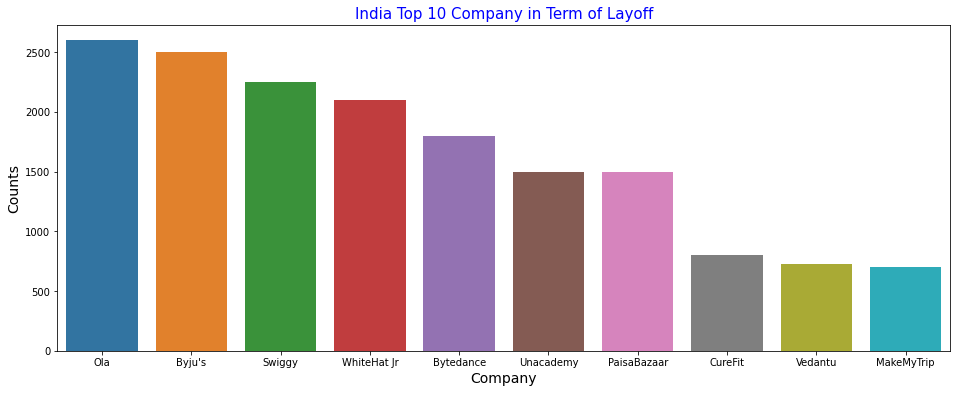

In [518]:
plt.figure(figsize=(16,6))
sns.barplot(x = top.company[:10] , y= top.total_counts[:10])
plt.title("India Top 10 Company in Term of Layoff", fontdict={'size':15, 'color':"Blue"})
plt.xlabel("Company",fontdict={'size':14, 'color': "black"})
plt.ylabel("Counts", fontdict={'size':14, 'color':"black"})


###### Conclusion:-
* From the above graph we observe that ola -> 2600, Byju's ->2500 followed by Swiggy

In [519]:
bottom = l1[l1['total_counts']<100]
bottom

,company,total_counts
50,FabHotels,80.0
51,LEAD,80.0
52,Pagarbook,80.0
53,Aqgromalin,80.0
54,PickYourTrail,70.0
55,WazirX,60.0
56,CleverTap,60.0
57,Breathe,50.0
58,Acko,45.0
59,Eruditus,40.0


## Compare the Data From Dates

In [520]:
print(df['date'].head())
print("/"*20)
print(df['date'].dtype)

0    2022-11-22
1    2022-11-22
2    2022-11-21
3    2022-11-19
4    2022-11-18
Name: date, dtype: object
////////////////////
object


In [521]:
df1 = df.copy()
df1['year'] = df["date"].str.split('-').str[0]
df1['month'] = df['date'].str.split('-').str[1]
df1['date'] = df['date'].str.split('-').str[2]


In [522]:
df1

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month
0,SIRCLO,Jakarta,Retail,160.0,0.08,22,Series B,Indonesia,92.0,2022,11
1,Trax,Singapore,Retail,80.0,0.08,22,Series E,Singapore,1000.0,2022,11
2,Kitopi,Dubai,Food,93.0,0.10,21,Series C,United States,804.0,2022,11
3,Zomato,Gurugram,Food,100.0,0.04,19,Series J,India,914.0,2022,11
4,Carvana,Phoenix,Transportation,1500.0,0.08,18,IPO,United States,1600.0,2022,11
...,...,...,...,...,...,...,...,...,...,...,...
1654,Service,Los Angeles,Travel,0.0,1.00,16,Seed,United States,5.1,2020,03
1655,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13,Unknown,United States,45.0,2020,03
1656,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13,Seed,United States,1.0,2020,03
1657,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12,Series C,United States,90.0,2020,03


In [528]:
df1['date'].dtype

dtype('O')

In [530]:
df1['year'] = df1['year'].astype(int)

In [531]:
df1['month'] = df1['month'].astype(int)
df1['date'] = df1['date'].astype(int)

In [532]:
df1.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                     int64
stage                   object
country                 object
funds_raised           float64
year                     int64
month                    int64
dtype: object

In [533]:
df1.head(2)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month
0,SIRCLO,Jakarta,Retail,160.0,0.08,22,Series B,Indonesia,92.0,2022,11
1,Trax,Singapore,Retail,80.0,0.08,22,Series E,Singapore,1000.0,2022,11


In [536]:
df1['year'].nunique()

3

In [537]:
df1['year'].unique()

array([2022, 2021, 2020])

###  Comparison of Layoffs to Previous Years:

In [539]:
df1['year'].value_counts(sort = True)

2022    983
2020    633
2021     43
Name: year, dtype: int64

Text(-8.700000000000003, 0.5, 'Total_laid_off')

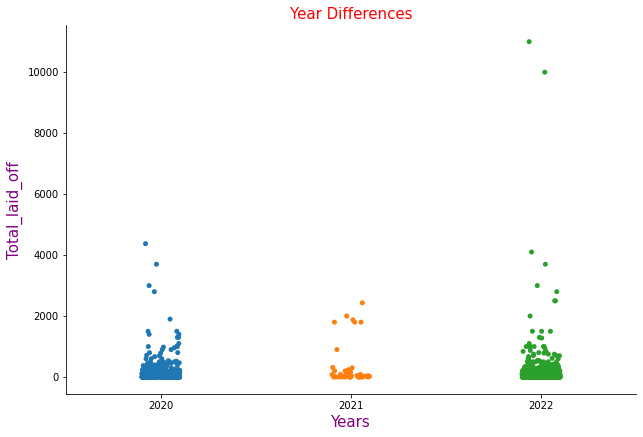

In [551]:
y = sns.catplot(x = 'year', y = 'total_laid_off', data = df1)
y.fig.set_figwidth(10)
y.fig.set_figheight(6)
plt.title('Year Differences', fontdict={'size': 15 , 'color': 'Red'})
plt.xlabel('Years', fontdict={'size':15, 'color':'Purple'})
plt.ylabel("Total_laid_off", fontdict={'size':15, 'color': 'Purple'})

### Total no. of Layoffs - Year wise calculation:-

In [554]:
df_layoff_2020 = df1[df1['year']==2020]

In [557]:
df_layoff_2021 = df1[df1['year'] ==2021]
df_layoff_2022 = df1[df1["year"] == 2022]

In [562]:
total_layoff_2020 = df_layoff_2020['total_laid_off'].sum()
total_layoff_2021 = df_layoff_2021['total_laid_off'].sum()
total_layoff_2022 = df_layoff_2022['total_laid_off'].sum()

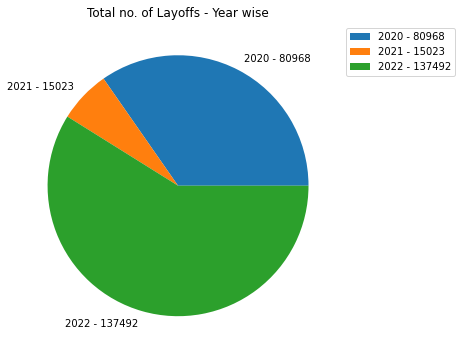

In [566]:
total_layoffs = (total_layoff_2020,total_layoff_2021,total_layoff_2022)
labels = ['2020 - 80968', '2021 - 15023', '2022 - 137492']
plt.figure(figsize=(10,6))
plt.pie(total_layoffs, labels= labels , shadow= False)
plt.legend( labels = labels, bbox_to_anchor = (1,1))

plt.title("Total no. of Layoffs - Year wise")
plt.show()

### Most Affected Sectore in India: 

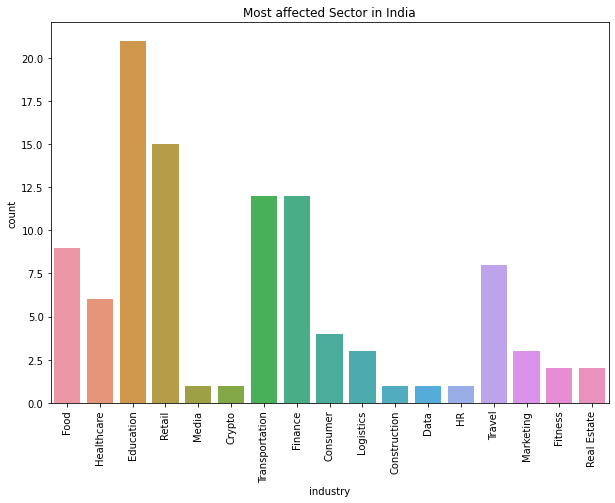

In [583]:
plt.figure(figsize=(10,7))
sns.countplot(x = lct['industry'], data= lct)
plt.title("Most affected Sector in India")
plt.xticks(rotation = 90)
plt.show()

### Overall Layoffs in Each Country:-

In [597]:
lc = df['country'].value_counts().reset_index().set_index('index')
lc[:10]

,country
index,
United States,1109
India,102
Canada,75
Brazil,53
United Kingdom,48
Germany,46
Israel,36
Australia,31
Singapore,22


In [602]:
lc = lc.rename(columns={'index': 'Country','country':'Companys'})
lc[:10]

,Company
index,
United States,1109
India,102
Canada,75
Brazil,53
United Kingdom,48
Germany,46
Israel,36
Australia,31
Singapore,22


Thank you for taking the time to read this 
interesting notebook . I Hope you like my work -- Ashish